### Importação dos dados



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [4]:
loja1_faturamento = loja['Preço'].sum()
loja2_faturamento = loja2['Preço'].sum()
loja3_faturamento = loja3['Preço'].sum()
loja4_faturamento = loja4['Preço'].sum()
print('loja1_faturamento:',loja1_faturamento)
print('loja2_faturamento:',loja2_faturamento)
print('loja3_faturamento:',loja3_faturamento)
print('loja4_faturamento:',loja4_faturamento)



loja1_faturamento: 1534509.12
loja2_faturamento: 1488459.06
loja3_faturamento: 1464025.03
loja4_faturamento: 1384497.58


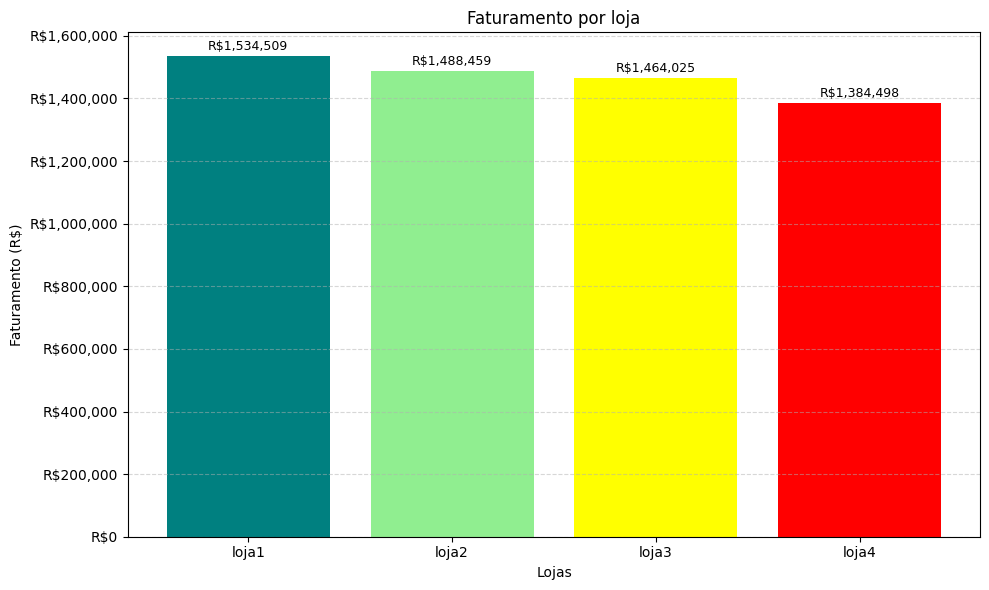

In [5]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

lojas = ['loja1','loja2','loja3','loja4']
faturamento = [1534509.12,1488459.06,1464025.03,1384497.58]

fig, ax = plt.subplots(figsize=(10,6))
barras = ax.bar(lojas, faturamento, color= ['#008080','#90EE90','#FFFF00','#FF0000'])

ax.set_title('Faturamento por loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Faturamento (R$)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'R${x:,.0f}'))

for barra in barras:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, valor + 20000,
            f'R${valor:,.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


A loja com o menor faturamento foi a loja 4.

# 2. Vendas por Categoria


In [6]:

categorias_loja1 = loja['Categoria do Produto'].value_counts().rename('Loja 1')
categorias_loja2 = loja2['Categoria do Produto'].value_counts().rename('Loja 2')
categorias_loja3 = loja3['Categoria do Produto'].value_counts().rename('Loja 3')
categorias_loja4 = loja4['Categoria do Produto'].value_counts().rename('Loja 4')

vendas_por_categoria = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4], axis=1)

vendas_por_categoria = vendas_por_categoria.fillna(0).astype(int)

print(" Quantidade de produtos vendidos por categoria em cada loja:")
print(vendas_por_categoria)

 Quantidade de produtos vendidos por categoria em cada loja:
                       Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
moveis                    465     442     499     480
eletronicos               448     422     451     451
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
utilidades domesticas     171     181     177     201


Os itens com menos vendas por categoria de produtos foram: instrumentos musicais, livros e utilidades domesticas.

Porcentagem de vendas por loja:
Loja 1: 25.00%
Loja 2: 25.00%
Loja 3: 25.00%
Loja 4: 24.99%

A loja com a menor porcentagem de vendas é Loja 4 com 24.99% das vendas totais.


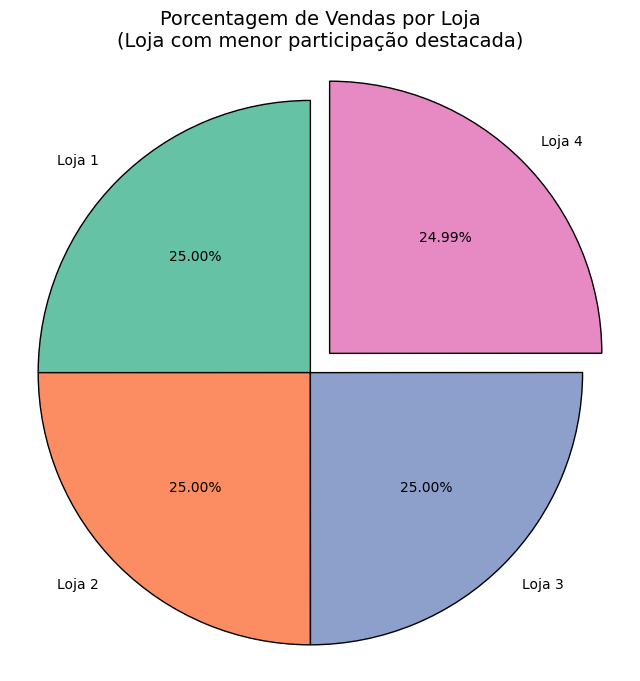

In [7]:

total_vendas = {
    'Loja 1': len(loja),
    'Loja 2': len(loja2),
    'Loja 3': len(loja3),
    'Loja 4': len(loja4)
}

total_vendas_series = pd.Series(total_vendas)

porcentagem_vendas = (total_vendas_series / total_vendas_series.sum()) * 100

print("Porcentagem de vendas por loja:")
for loja_nome, perc in porcentagem_vendas.items():
    print(f"{loja_nome}: {perc:.2f}%")

menor_loja = porcentagem_vendas.idxmin()
menor_valor = porcentagem_vendas.min()
print(f"\nA loja com a menor porcentagem de vendas é {menor_loja} com {menor_valor:.2f}% das vendas totais.")

cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']
explode = [0, 0, 0, 0]

indice_menor = list(porcentagem_vendas.index).index(menor_loja)
explode[indice_menor] = 0.1

plt.figure(figsize=(8, 8))
plt.pie(
    porcentagem_vendas,
    labels=porcentagem_vendas.index,
    autopct=lambda pct: f"{pct:.2f}%",
    startangle=90,
    colors=cores,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Porcentagem de Vendas por Loja\n(Loja com menor participação destacada)', fontsize=14)
plt.axis('equal')
plt.show()



# 3. Média de Avaliação das Lojas

In [8]:

media_avaliacao = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean(),
}

media_avaliacao_series = pd.Series(media_avaliacao)

print("Média das avaliações dos clientes por loja:")
print(media_avaliacao_series)




Média das avaliações dos clientes por loja:
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
dtype: float64


A loja com a menor media de avaliações foi a loja 1 seguida da loja 4.

# 4. Produtos Mais e Menos Vendidos

In [12]:
lojas_dict = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}
for nome, df in lojas_dict.items():
    if "Produto" in df.columns:
        vc = df["Produto"].value_counts()
        print(f"\n{nome}")
        print(f"Mais vendido: {vc.idxmax()} ({vc.max()} unidades)")
        print(f"Menos vendido: {vc.idxmin()} ({vc.min()} unidades)")


Loja 1
Mais vendido: Micro-ondas (60 unidades)
Menos vendido: Headset (33 unidades)

Loja 2
Mais vendido: Iniciando em programação (65 unidades)
Menos vendido: Jogo de tabuleiro (32 unidades)

Loja 3
Mais vendido: Kit banquetas (57 unidades)
Menos vendido: Blocos de montar (35 unidades)

Loja 4
Mais vendido: Cama box (62 unidades)
Menos vendido: Guitarra (33 unidades)


# 5. Frete Médio por Loja


In [13]:
frete_medio = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean(),
}

frete_medio_series = pd.Series(frete_medio).round(2)

print("Custo médio de frete por loja:")
print(frete_medio_series)


Custo médio de frete por loja:
Loja 1    34.69
Loja 2    33.62
Loja 3    33.07
Loja 4    31.28
dtype: float64


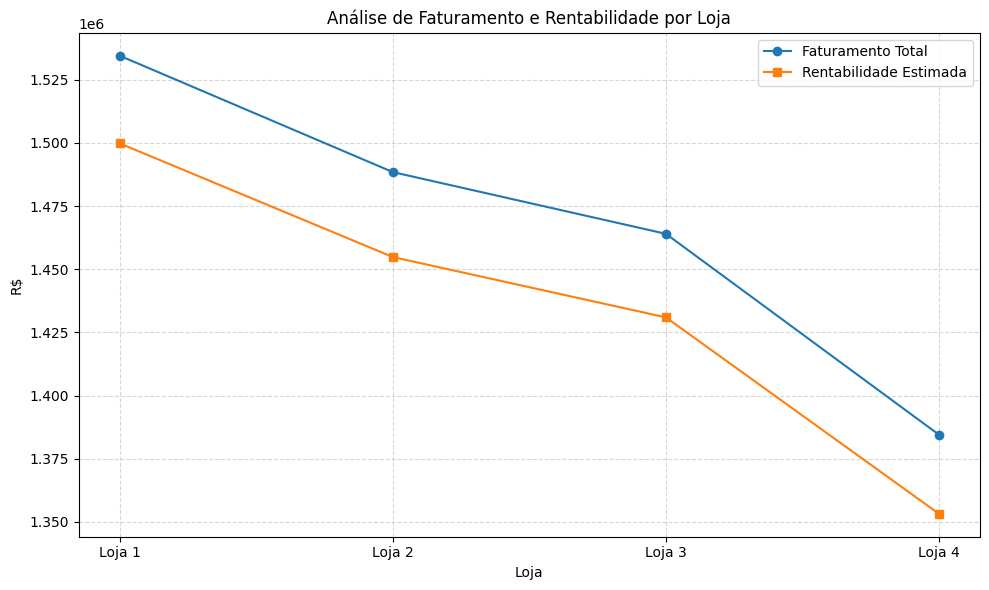

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]
custo_frete_medio = [34.69, 33.62, 33.07, 31.28]
frete_estimado = [v * 1000 for v in custo_frete_medio]
rentabilidade = [f - fr for f, fr in zip(faturamento, frete_estimado)]

df = pd.DataFrame({
    'Loja': lojas,
    'Faturamento': faturamento,
    'Rentabilidade': rentabilidade
})

plt.figure(figsize=(10, 6))
plt.plot(df['Loja'], df['Faturamento'], marker='o', label='Faturamento Total')
plt.plot(df['Loja'], df['Rentabilidade'], marker='s', label='Rentabilidade Estimada')
plt.title('Análise de Faturamento e Rentabilidade por Loja')
plt.xlabel('Loja')
plt.ylabel('R$')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


📊 Relatório de Análise de Vendas e Desempenho por Loja

1. Analise do Faturamento
A análise dos dados revelou que a Loja 1 possui o maior faturamento entre todas, seguida pelas Lojas 2 e 3. A Loja 4, por sua vez, apresentou o menor percentual de faturamento, o que indica uma menor representatividade no volume financeiro total das vendas.

2. Vendas por Categoria
As categorias com menor volume de vendas foram:
Instrumentos Musicais
Livros
Utilidades Domésticas

Apesar de uma distribuição relativamente proporcional entre as lojas, a Loja 4 obteve o menor desempenho por categoria, com apenas 24,99% das vendas totais, reforçando sua baixa participação no mercado analisado.

3. Média de Avaliação por Loja
A média das avaliações atribuídas pelos clientes mostra os seguintes destaques:

Loja 1 apresentou a menor média de avaliação, indicando possível necessidade de melhorias na experiência do cliente.

Loja 4 teve desempenho semelhante, também com nota inferior às demais lojas.

Esse resultado pode estar relacionado à qualidade dos produtos, prazos de entrega ou atendimento pós-venda.

4. Produtos Mais e Menos Vendidos
Cada loja demonstrou tendências distintas de consumo, com variação nos produtos mais e menos vendidos. Isso sugere que o público de cada loja possui preferências específicas.

5. Frete Medio por Loja
Em relação ao custo médio de frete por loja:
A Loja 1 registrou o maior custo médio, o que pode estar relacionado a maior volume de entregas
A Loja 4 teve o menor custo médio, destacando-se pela eficiência logística ou localização dos clientes.

6. Decisão Final

Vender a Loja 4:
Pois tem o menor faturamento e menor rentabilidade.
Apesar do frete mais barato e avaliação razoável, ela é a menos lucrativa.
A venda dessa loja liberaria capital para investir nas lojas mais rentáveis (Loja 1 ou 3).
Então vender a loja 4 seria a decisão mais estrategica.

